In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [15]:
X = pd.read_csv('./modified_datasets/mon_features.csv')
y = pd.read_csv('./modified_datasets/mon_labels.csv')

---
## 1. RF to get feature importance score

In [16]:
clf = RandomForestClassifier(n_estimators=20, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)

In [17]:
clf.fit(X, y)
imp_score=clf.feature_importances_

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [18]:
top_indices=np.argsort(imp_score)[::-1][:5]
print(top_indices)
top_feature_names=[X.columns[int(x)] for x in top_indices]
print(top_feature_names)

[15 16 11  7  3]
['outpkt_avg_ordering', 'outpkt_std_ordering', 'outpkt_num', 'inpkt_avg_ordering', 'inpkt_num']


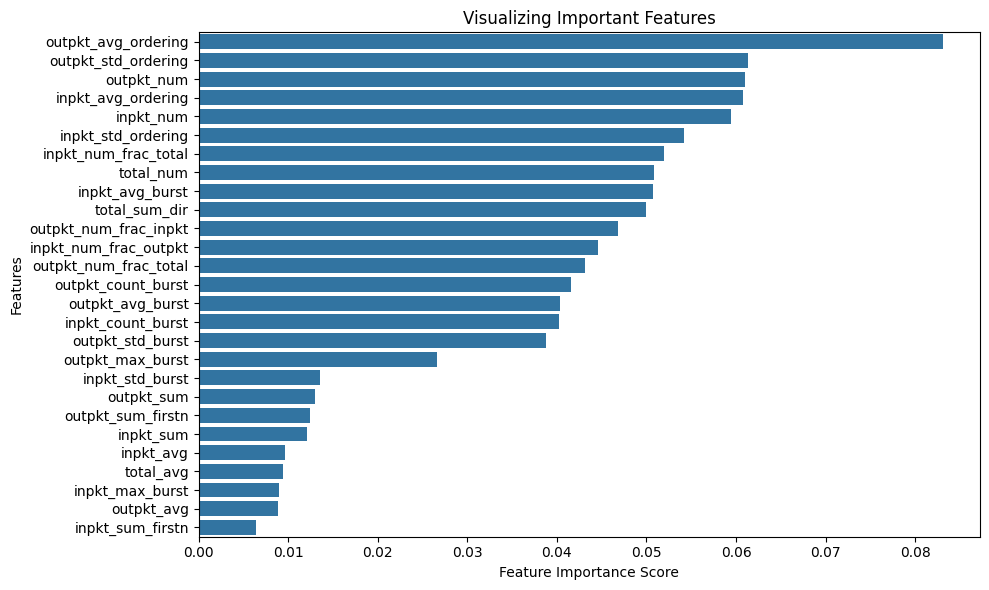

In [19]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout() 

---
## 2. Checking correlation & Feature selection

In [20]:
Xy = pd.concat([X, y], axis=1)
Xy

,total_num,total_sum_dir,total_avg,inpkt_num,inpkt_avg,inpkt_sum,inpkt_num_frac_total,inpkt_avg_ordering,inpkt_std_ordering,inpkt_num_frac_outpkt,...,outpkt_sum_firstn,inpkt_std_burst,inpkt_max_burst,inpkt_avg_burst,inpkt_count_burst,outpkt_std_burst,outpkt_max_burst,outpkt_avg_burst,outpkt_count_burst,label
0,1421,-603648,4.315749,1300,4.292023,5579.63,0.914849,704.106154,398.486335,10.743802,...,7.39,17.195458,66,16.666667,78,1.139584,8,1.551282,78,0
1,518,-183296,4.611815,438,4.673242,2046.88,0.845560,264.406393,150.591146,5.475000,...,9.71,12.176200,50,9.319149,47,1.128262,5,1.702128,47,0
2,1358,-574464,5.488969,1240,5.459452,6769.72,0.913108,668.259677,381.878642,10.508475,...,7.83,16.584084,50,16.315789,76,0.978650,6,1.552632,76,0
3,1446,-615424,5.995512,1324,5.948693,7876.07,0.915629,713.503021,406.205288,10.852459,...,11.53,17.252464,70,16.550000,80,0.851102,5,1.525000,80,0
4,1406,-602112,4.698869,1291,4.663873,6021.06,0.918208,694.740511,395.028889,11.226087,...,7.17,16.014144,60,16.341772,79,0.882996,5,1.455696,79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,9434,-4196352,8.357126,8815,8.313217,73281.01,0.934386,4707.505615,2698.463332,14.240711,...,7.76,18.830604,83,23.632708,373,1.858073,20,1.659517,373,94
18996,9956,-4532224,8.848545,9404,8.864870,83365.24,0.944556,5003.064653,2863.806259,17.036232,...,8.59,19.337639,100,25.977901,362,1.955137,30,1.529086,361,94
18997,9952,-4502528,8.385506,9373,8.390341,78642.67,0.941821,4988.437000,2857.611288,16.188256,...,7.28,18.844241,78,25.264151,371,1.670568,22,1.560647,371,94
18998,9926,-4375552,14.007044,9236,13.983552,129152.09,0.930486,4938.918796,2844.328152,13.385507,...,16.47,18.568725,85,22.692875,407,1.712990,14,1.699507,406,94


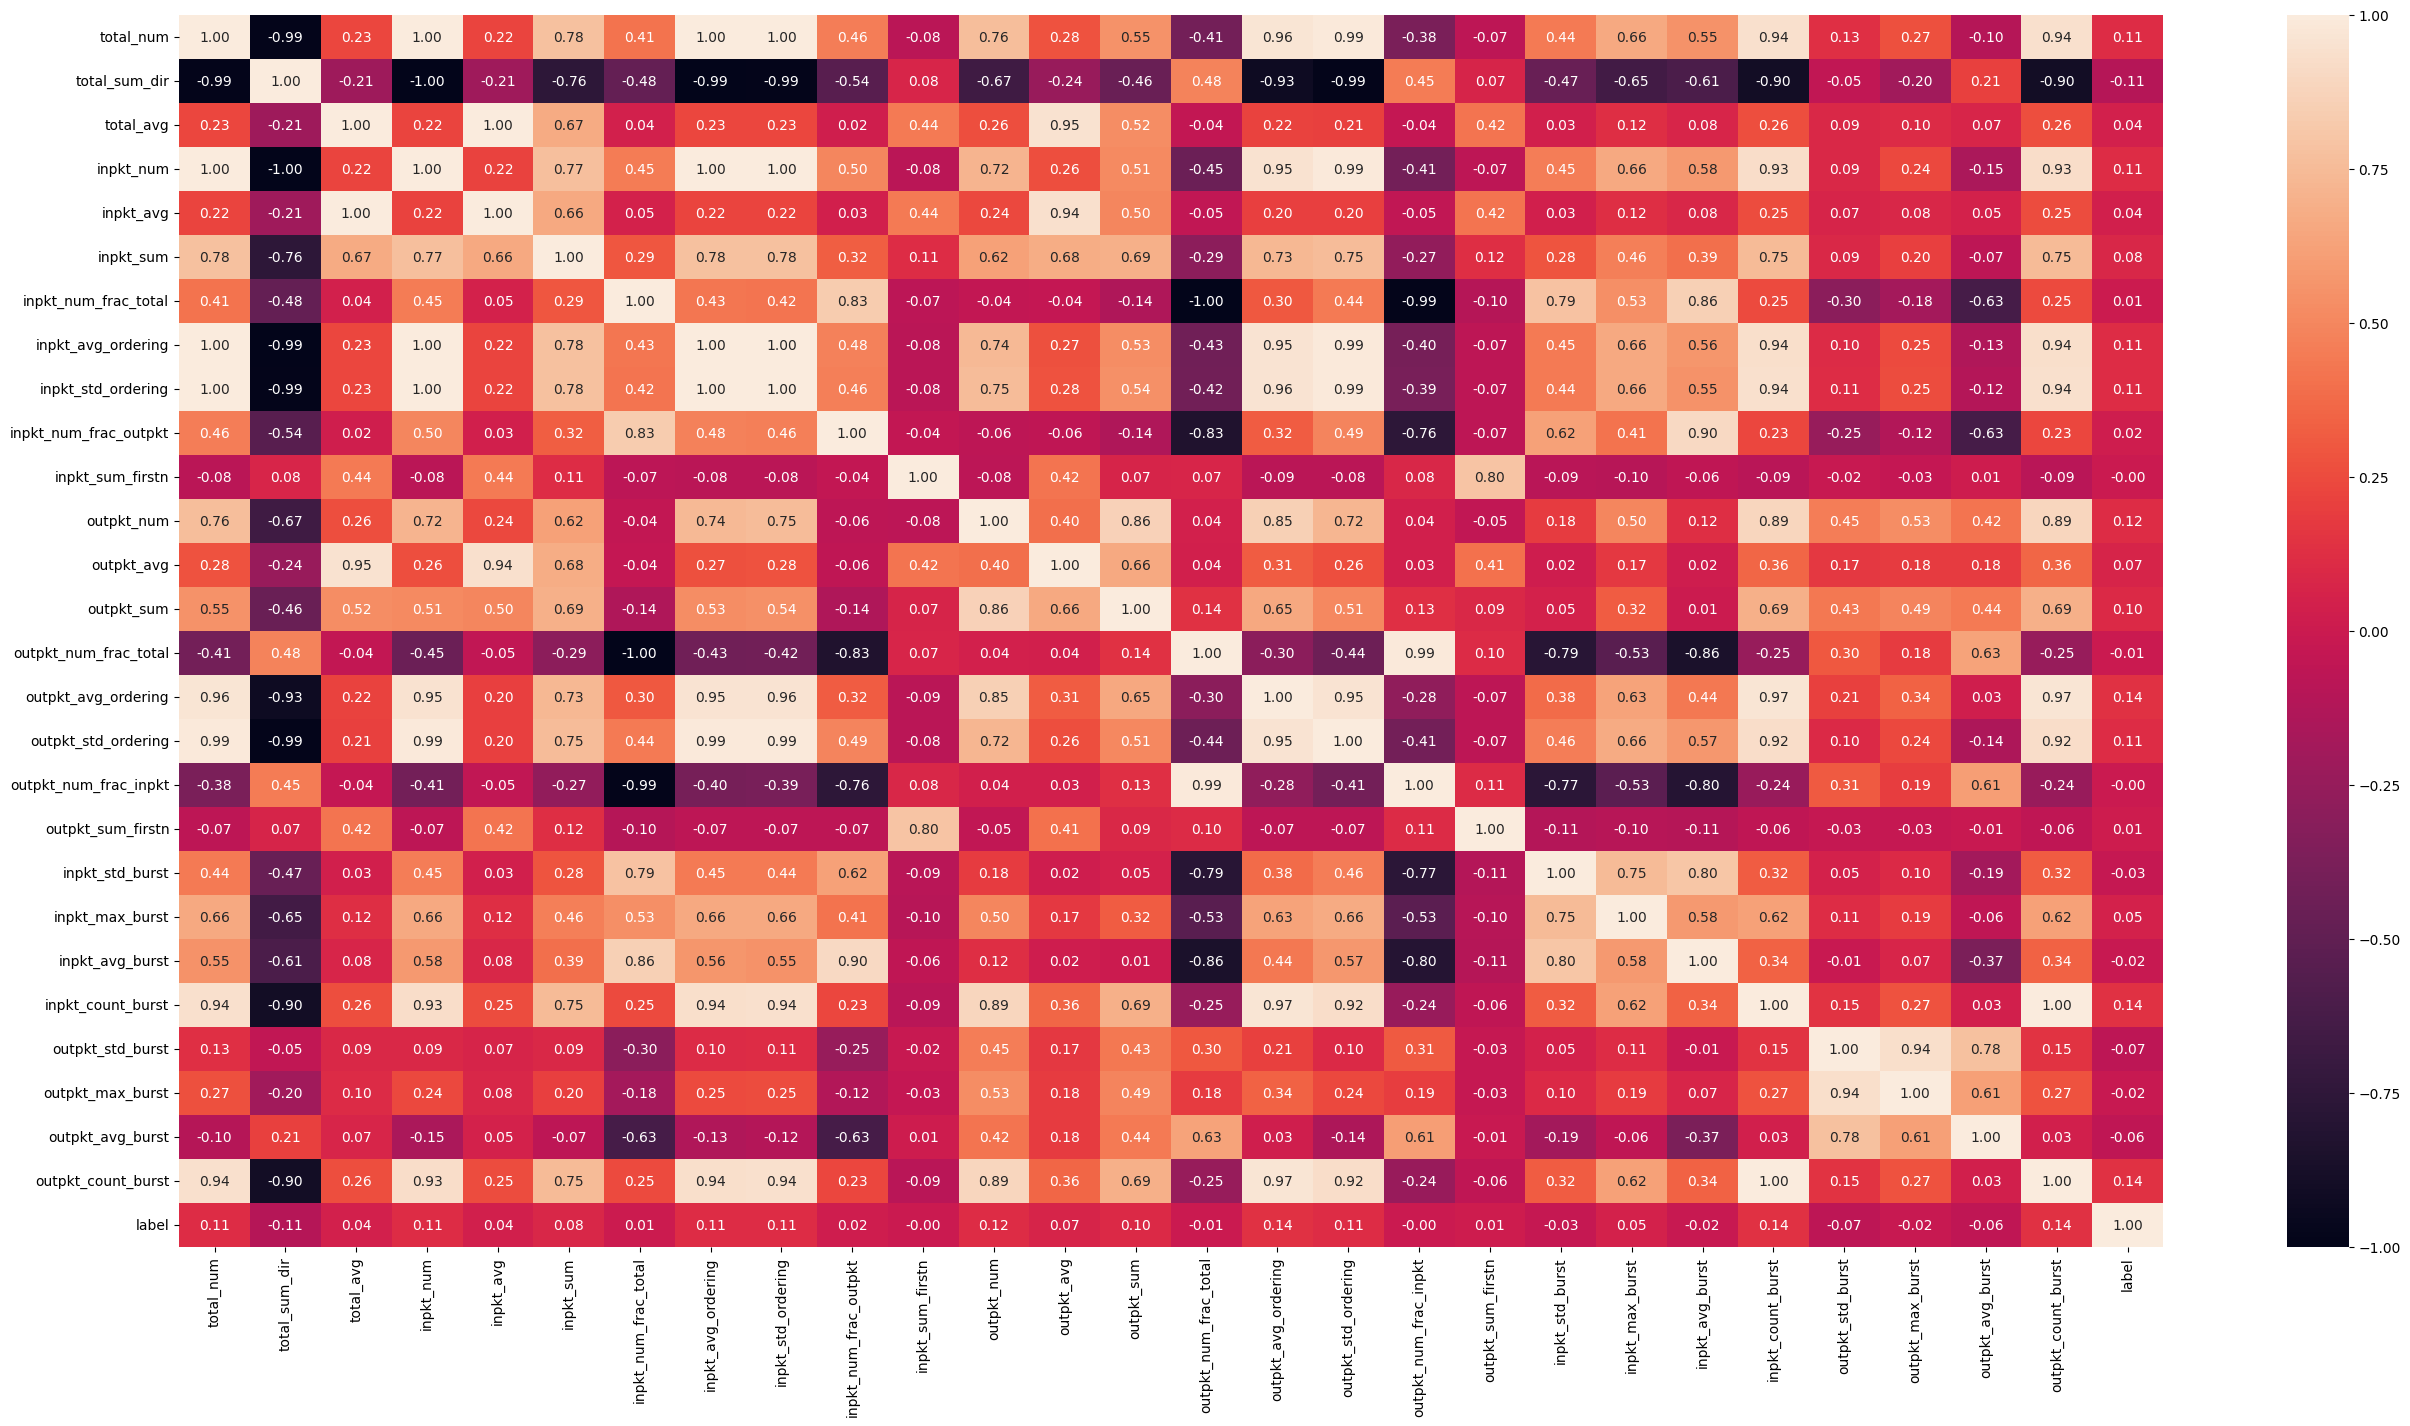

In [28]:
plt.figure(figsize=(32, 16))
corr = Xy.corr()
ax = sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [22]:
corr_y = abs(corr['label'])
cols = corr_y[corr_y>0.1]
print(cols)
print(cols.index)

total_num              0.112601
total_sum_dir          0.105329
inpkt_num              0.109466
inpkt_avg_ordering     0.109857
inpkt_std_ordering     0.112631
outpkt_num             0.115715
outpkt_avg_ordering    0.136013
outpkt_std_ordering    0.111382
inpkt_count_burst      0.137835
outpkt_count_burst     0.137597
label                  1.000000
Name: label, dtype: float64
Index(['total_num', 'total_sum_dir', 'inpkt_num', 'inpkt_avg_ordering',
       'inpkt_std_ordering', 'outpkt_num', 'outpkt_avg_ordering',
       'outpkt_std_ordering', 'inpkt_count_burst', 'outpkt_count_burst',
       'label'],
      dtype='object')


In [30]:
x = X[['total_num', 'total_sum_dir', 'inpkt_num', 'inpkt_avg_ordering',
       'inpkt_std_ordering', 'outpkt_num', 'outpkt_avg_ordering',
       'outpkt_std_ordering', 'inpkt_count_burst', 'outpkt_count_burst']]
       
x

,total_num,total_sum_dir,inpkt_num,inpkt_avg_ordering,inpkt_std_ordering,outpkt_num,outpkt_avg_ordering,outpkt_std_ordering,inpkt_count_burst,outpkt_count_burst
0,1421,-603648,1300,704.106154,398.486335,121,773.322314,515.483953,78,78
1,518,-183296,438,264.406393,150.591146,80,226.162500,139.231951,47,47
2,1358,-574464,1240,668.259677,381.878642,118,786.110169,472.735508,76,76
3,1446,-615424,1324,713.503021,406.205288,122,820.139344,513.916038,80,80
4,1406,-602112,1291,694.740511,395.028889,115,789.608696,503.993490,79,79
...,...,...,...,...,...,...,...,...,...,...
18995,9434,-4196352,8815,4707.505615,2698.463332,619,4844.586430,3053.116218,373,373
18996,9956,-4532224,9404,5003.064653,2863.806259,552,4541.974638,3010.091146,362,361
18997,9952,-4502528,9373,4988.437000,2857.611288,579,4766.072539,3102.381602,371,371
18998,9926,-4375552,9236,4938.918796,2844.328152,690,5278.146377,3116.574388,407,406


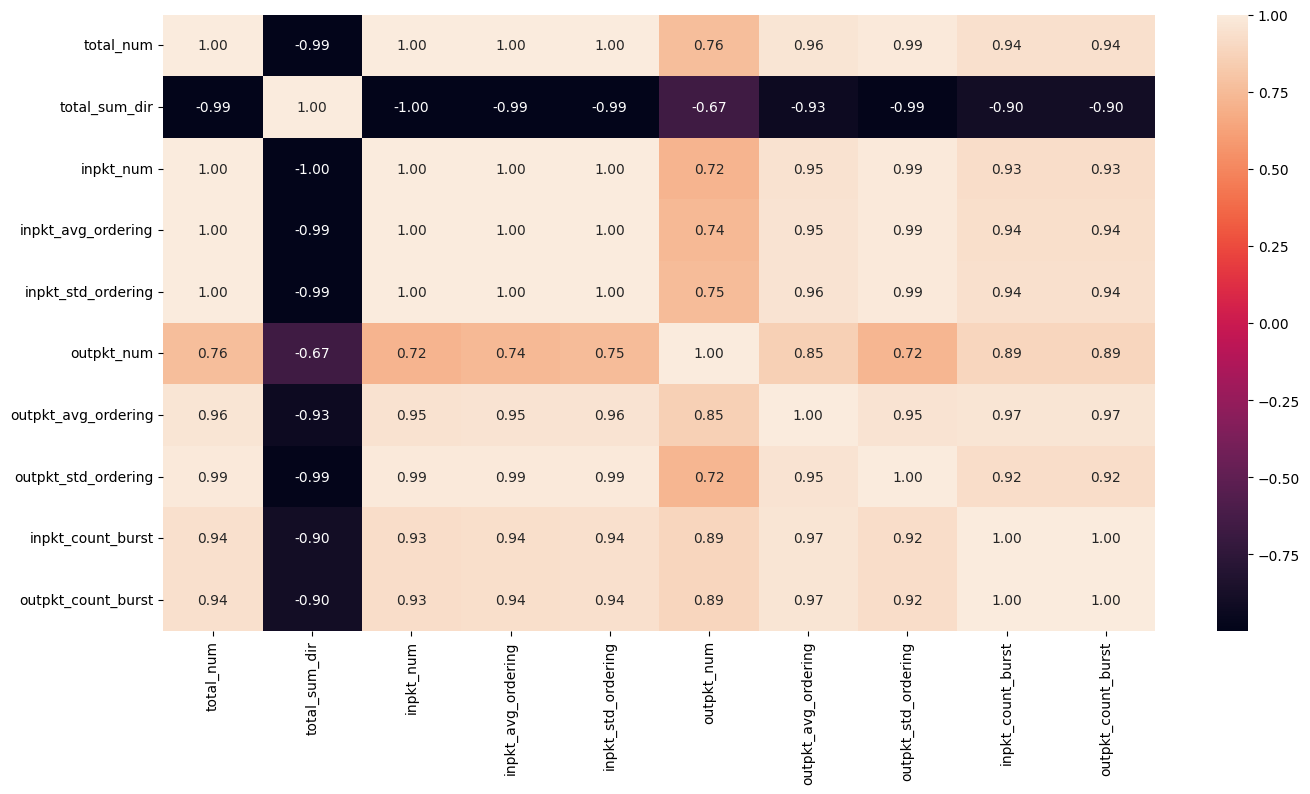

In [31]:
plt.figure(figsize=(16, 8))
ax = sns.heatmap(x.corr(), annot=True, fmt='.2f')
plt.show()